In [1]:
#import libraries Pandas  and numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Read csv file for 2016, 2017, 2018, 2019, 2020 and 2021 years
dat_2016 = pd.read_csv("../data/2016_crime.csv")
dat_2017 = pd.read_csv("../data/2017_crime.csv")
dat_2018 = pd.read_csv("../data/2018_crime.csv") 
dat_2019 = pd.read_csv("../data/2019_crime.csv") 
dat_2020 = pd.read_csv("../data/2020_crime.csv")
dat_2021= pd.read_csv("../data/2021_crime.csv")

In [3]:
## building a function to create a new dataframe consisting of just two featurs:distrcts and primary_type(crimes)
def extract_feature (arg):
    data=arg[['district','primary_type']]
    return data
new_shape_data_2016= extract_feature(dat_2016)
#print(f'new shape data for 2016 dataframe\n{new_shape_data_2016}')
new_shape_data_2017=extract_feature(dat_2017)
#print(f'new shape data for 2017 dataframe\n{new_shape_data_2017}')
new_shape_data_2018=extract_feature(dat_2018)
#print(f'new shape data for 2018 dataframe\n{new_shape_data_2018}')
new_shape_data_2019=extract_feature(dat_2019)
#print(f'new shape data for 2019 dataframe\n{new_shape_data_2019}')
new_shape_data_2020=extract_feature(dat_2020)
#print(f'new shape data for 2020 dataframe\n{new_shape_data_2020}')
new_shape_data_2021=extract_feature(dat_2021)
#print(f'new shape data for 2021 dataframe\n{new_shape_data_2021}')



In [4]:
##build functions to group the districts with crimes and areas

# A function to group primary_type and district of different years
def grop_dat (df):
    group_crim_distr=df.groupby(['district'])[['primary_type']].count()
    # remove the 31 district code as it is consider as a special case
    group_crim_distr=group_crim_distr.iloc[:-1]
    # reset index
    group_crim_distr.reset_index(inplace=True)
    return group_crim_distr

##Classify Chicago state police districts
#https://news.wttw.com/sites/default/files/Map%20of%20Chicago%20Police%20Districts%20and%20Beats.pdf

# Classify the Chicago districts to regions based on police district codes
def classify_police_districts(code_district):
    area_Central=[1, 2, 3, 8, 9, 10, 12, 13, 18]
    area_South=[4, 5, 6, 7, 22]      
    area_North=[11, 14, 15, 16, 17, 19, 20, 24, 25] 
    if code_district in  area_Central:
        return 'Central'
    elif code_district in area_South:
        return 'South'
    elif code_district in area_North:
        return 'North'

# Calculate the crime rate per region
def calculate_total_crime_rate(df):
    total_crime_rate=df.groupby('Region').Percent_Change_of_crime.mean()
    return total_crime_rate

# Calculate the total crimes per region 
def calculate_total_crime(df):
    total_crime_rate=df.groupby('Region').primary_type.mean()
    return total_crime_rate


# Function to calculate the total crimes and their prpopotion per grouped region
def calculate_propotions (pd_srs,region_list):
    
    return [float(pd_srs[reg]) / pd_srs.sum() for reg in region_list]


In [5]:
# Find the total crimes per district

  
grouped_crim_per_dist_2016=grop_dat(new_shape_data_2016)
#print('grouping number of crimes per each distric in 2016')
#print(grouped_crim_per_dist_2016)

grouped_crim_per_dist_2017=grop_dat(new_shape_data_2017)
#print('grouping number of crimes per eachdistric in 2017')
#print(grouped_crim_per_dist_2017)

grouped_crim_per_dist_2018=grop_dat(new_shape_data_2018)
#print('grouping number of crimes per each distric in 2018') 
#print(grouped_crim_per_dist_2018)

grouped_crim_per_dist_2019=grop_dat(new_shape_data_2019)
#print('grouping number of crimes per each distric in 2019')
#print(grouped_crim_per_dist_2019)

grouped_crim_per_dist_2020=grop_dat(new_shape_data_2020)
#print('grouping number of crimes per each distric in 2020')
#print(grouped_crim_per_dist_2020)

grouped_crim_per_dist_2021=grop_dat(new_shape_data_2021)
#print('grouping number of crimes per each distric in 2021')
#print(grouped_crim_per_dist_2021)

In [6]:
# Grouping the Chicago districts to regions
grouped_crim_per_dist_2016['Region']=grouped_crim_per_dist_2016['district'].apply(classify_police_districts)
grouped_crim_per_dist_2017['Region']=grouped_crim_per_dist_2017['district'].apply(classify_police_districts)
grouped_crim_per_dist_2018['Region']=grouped_crim_per_dist_2018['district'].apply(classify_police_districts)
grouped_crim_per_dist_2019['Region']=grouped_crim_per_dist_2019['district'].apply(classify_police_districts)
grouped_crim_per_dist_2020['Region']=grouped_crim_per_dist_2020['district'].apply(classify_police_districts)
grouped_crim_per_dist_2021['Region']=grouped_crim_per_dist_2021['district'].apply(classify_police_districts)



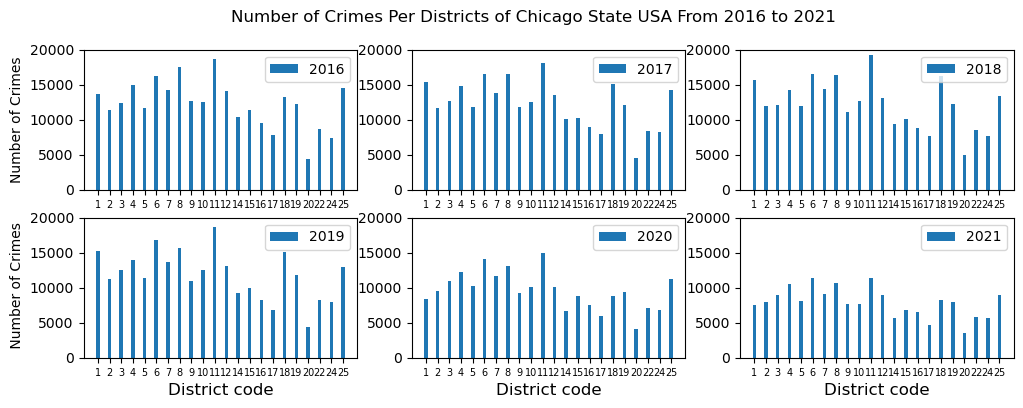

In [7]:
## initializing data for plotting and visualizing the number of crime per district for
## the years 2016,2017,2018,2019,2020 and 2021

fig, ((ax1,ax2,ax3,),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(12,4))

# Plotting for year 2016
districts_2016=grouped_crim_per_dist_2016['district'].to_list()
y1=np.array(grouped_crim_per_dist_2016['primary_type'])
x1=np.arange(len(y1))
ax1.bar(x1,y1,width=0.3,label='2016')
ax1.set_xticks(x1)
ax1.set_xticklabels(districts_2016,rotation=0,fontsize=7)
ax1.set_ylabel('Number of Crimes')
ax1.legend()
ax1.set_ylim(0,20000)

# Plotting for year 2017
districts_2017=grouped_crim_per_dist_2017['district'].to_list()
districts_2017=list(map(int,districts_2017))
y2=np.array(grouped_crim_per_dist_2017['primary_type'])
x2=np.arange(len(y2))
ax2.bar(x2,y2,width=0.3,label='2017')
ax2.set_xticks(x2)
ax2.set_xticklabels(districts_2017,rotation=0,fontsize=7)
#ax2.set_ylabel('Number of primary_type of Crimes for per distict')
ax2.legend()
ax2.set_ylim(0,20000)

# Plotting for year 2018
districts_2018=grouped_crim_per_dist_2018['district'].to_list()
y3=np.array(grouped_crim_per_dist_2018['primary_type'])
x3=np.arange(len(y3))
ax3.bar(x3,y3,width=0.3,label='2018')
ax3.set_xticks(x3)
ax3.set_xticklabels(districts_2018,rotation=0,fontsize=7)
#ax3.set_ylabel('Number of primary_type of Crimes for per distict')
ax3.legend()
ax3.set_ylim(0,20000)

# Plotting for year 2019
districts_2019= grouped_crim_per_dist_2019['district'].to_list()
y4=np.array(grouped_crim_per_dist_2019['primary_type'])
x4=np.arange(len(y4))
ax4.bar(x4,y4,width=0.3,label='2019')
ax4.set_ylabel(' Number of Crimes')
ax4.set_xticks(x4)
ax4.set_xticklabels(districts_2019,rotation=0,fontsize=7)
ax4.set_xlabel('District code',fontsize=12)
ax4.legend()
ax4.set_ylim(0,20000)

# Plotting for year 2020
districts_2020=grouped_crim_per_dist_2020['district'].to_list()
y5=np.array(grouped_crim_per_dist_2020['primary_type'])
x5=np.arange(len(y5))
ax5.bar(x5,y5,width=0.3,label='2020')
ax5.set_xticks(x5)
ax5.set_xticklabels(districts_2020,rotation=0,fontsize=7)
#ax5.set_ylabel('Number of primary_type of Crimes for per distict')
ax5.set_xlabel('District code',fontsize=12)
ax5.legend()
ax5.set_ylim(0,20000)

# Plotting for year 2021
districts_2021=grouped_crim_per_dist_2021['district'].to_list()
y6=np.array(grouped_crim_per_dist_2021['primary_type'])
x6=np.arange(len(y6))
ax6.bar(x6,y6,width=0.3,label='2021')
ax6.set_xticks(x6)
ax6.set_xticklabels(districts_2021,rotation=0,fontsize=7)
#ax6.set_ylabel(' Number of primary_type of Crimes for per distict')
ax6.set_xlabel('District code',fontsize=12)
ax6.legend()
ax6.set_ylim(0,20000)

fig.suptitle('Number of Crimes Per Districts of Chicago State USA From 2016 to 2021',fontsize=12)
plt.show()


## Observation
#### Through the years 2016, 2017,2018 and 2019, the trend of crimes in most of districts have not faced a big change. Unlikely, the other figures (for years 2020 and 2021) show a noticeable decrease in the level of crimes in all districts, particularly in the areas coded 1, 8, 11 and 18 with the largest-scale of criminal activities that are dropped to about 10000 crimes or less in 2021.

In [8]:
# Calculate the total crimes and their propotions of Chicago city from 2016 to 2021 based on grouped regions.

total_crime_2016=calculate_total_crime(grouped_crim_per_dist_2016)
total_crime_2017=calculate_total_crime(grouped_crim_per_dist_2017)
total_crime_2018=calculate_total_crime(grouped_crim_per_dist_2018)
total_crime_2019=calculate_total_crime(grouped_crim_per_dist_2019)
total_crime_2020=calculate_total_crime(grouped_crim_per_dist_2020)
total_crime_2021=calculate_total_crime(grouped_crim_per_dist_2021)

regions=['Central','South','North']

proportion_crimes_2016= calculate_propotions(total_crime_2016,regions)
proportion_crimes_2017= calculate_propotions(total_crime_2017,regions)
proportion_crimes_2018= calculate_propotions(total_crime_2018,regions)
proportion_crimes_2019= calculate_propotions(total_crime_2019,regions)
proportion_crimes_2020= calculate_propotions(total_crime_2020,regions)
proportion_crimes_2021= calculate_propotions(total_crime_2021,regions)


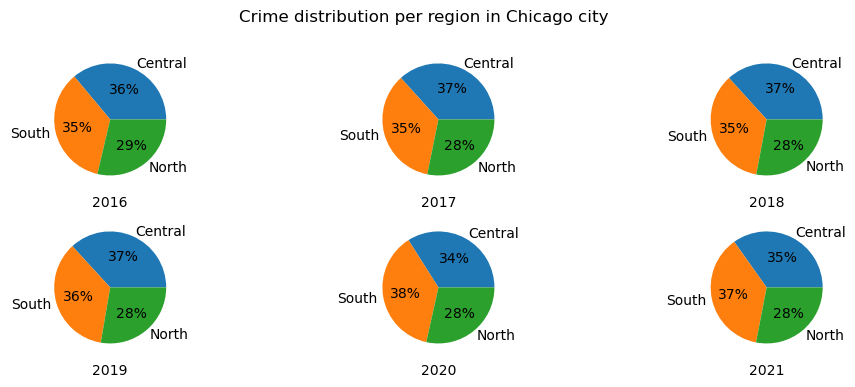

In [9]:
# Plot the crime distribution based on regions
fig, ((ax1,ax2,ax3,),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(12,4))

#year 2016
ax1.pie(proportion_crimes_2016, labels=regions, autopct='%.0f%%')
ax1.set_xlabel('2016',fontsize=10)

# year 2017
ax2.pie(proportion_crimes_2017, labels=regions, autopct='%.0f%%')
ax2.set_xlabel('2017')

#year 2018
ax3.pie(proportion_crimes_2018, labels=regions, autopct='%.0f%%')
ax3.set_xlabel('2018')

#year 2019
ax4.pie(proportion_crimes_2019, labels=regions, autopct='%.0f%%')
ax4.set_xlabel('2019')

#year 2020
ax5.pie(proportion_crimes_2020, labels=regions, autopct='%.0f%%')
ax5.set_xlabel('2020')

# year 2021
ax6.pie(proportion_crimes_2021, labels=regions, autopct='%.0f%%')
ax6.set_xlabel('2021')

fig.suptitle('Crime distribution per region in Chicago city',fontsize=12)
plt.show()


## Observation
#### There is no change in the crime trend distribution before or after covid19 pandamic. The central Chicago region still has the highest rate while the South has the lowest.

In [10]:
## calculating the percent change of the primary_type of crimes per distric for 
##                                        1- Among the three years befor Covid19 (2016,2017,and 2018) 
##                                        2- Between the years 2018 and biging of covid 2019
##                                        3- Among the three years during Covid19 (2019,2020,and 2021)

    
## Between the years (2016,2017)
#print('percent change of crimes Between the years (2016,2017) ')
#districts_2017=list(map(int,districts_2017))
grouped_crim_per_dist_2017['Percent_Change_of_crime']=(((grouped_crim_per_dist_2017['primary_type']-grouped_crim_per_dist_2016['primary_type'])/grouped_crim_per_dist_2016['primary_type'])*100)
#print(grouped_crim_per_dist_2017)


## Between the years (2017,2018)
#print('percent change of crimes Between the years(2017,2018)')
grouped_crim_per_dist_2018['Percent_Change_of_crime']=(((grouped_crim_per_dist_2018['primary_type']-grouped_crim_per_dist_2017['primary_type'])/grouped_crim_per_dist_2017['primary_type'])*100)
#print(grouped_crim_per_dist_2018)

## Between the years (2018,2019)
#print('percent change of crimes Between the years(2018,2019)')
grouped_crim_per_dist_2019['Percent_Change_of_crime']=(((grouped_crim_per_dist_2019['primary_type']-grouped_crim_per_dist_2018['primary_type'])/grouped_crim_per_dist_2018['primary_type'])*100)
#print(grouped_crim_per_dist_2019)

## Between the years (2019, 2020)
#print('percent change of crimes Between the years(2019,2020)')
grouped_crim_per_dist_2020['Percent_Change_of_crime']=(((grouped_crim_per_dist_2020['primary_type']-grouped_crim_per_dist_2019['primary_type'])/grouped_crim_per_dist_2019['primary_type'])*100)
#print(grouped_crim_per_dist_2020)

## Between the years (2020,2021)
#print('percent change of crimes Between the years(2020,2021)')
grouped_crim_per_dist_2021['Percent_Change_of_crime']=(((grouped_crim_per_dist_2021['primary_type']-grouped_crim_per_dist_2020['primary_type'])/grouped_crim_per_dist_2020['primary_type'])*100)
#print(grouped_crim_per_dist_2021)



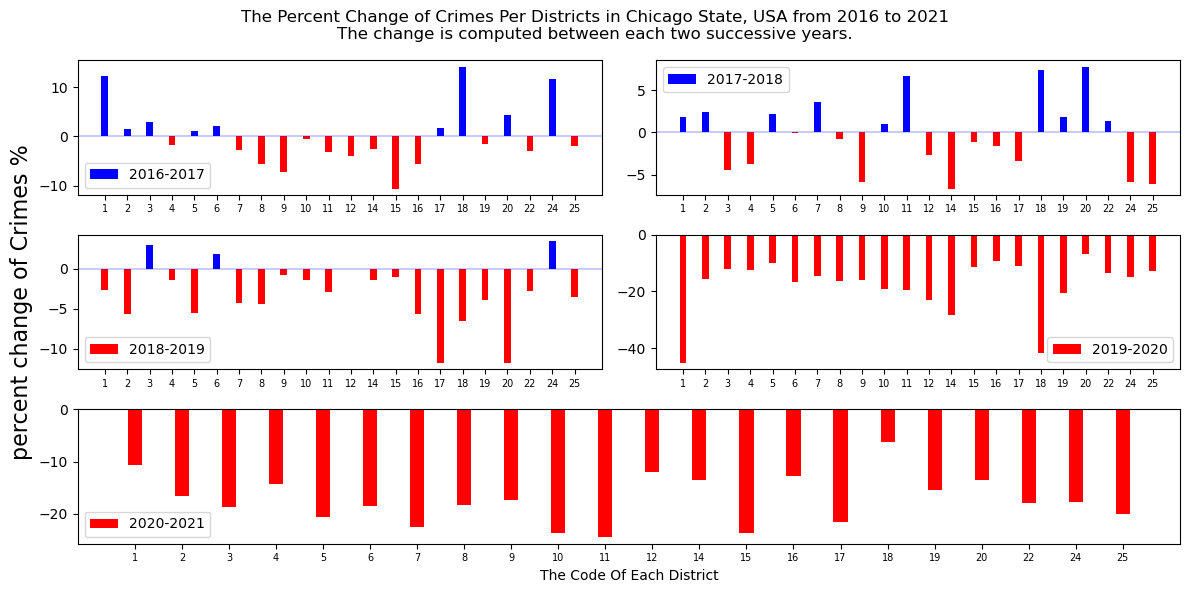

In [11]:
## initializing data for plotting and visualizing percent change of crimes for the years from 2016 to 2021 included

fig = plt.figure(figsize=(12,6))

## Plotting Pecent Change Between the Years (2016,2017)
districts_2017=grouped_crim_per_dist_2017['district'].to_list() # grouped_crim_per_dist_2017.index.to_list()
districts_2017=list(map(int,districts_2017))
y1=np.array(grouped_crim_per_dist_2017['Percent_Change_of_crime'])
x1=np.arange(len(y1))

#ax1 = plt.subplot(3,2,1)
ax1 = plt.subplot2grid((3,2), (0,0))

ax1.bar(x1,y1,width=0.3,label='2016-2017',color=np.where(y1>0, 'b', 'r'))
ax1.axhline(y=0, color='b', linestyle='-',linewidth=0.3)
ax1.set_xticks(x1)
ax1.set_xticklabels(districts_2017,rotation=0,fontsize=7)
#ax1.set_ylabel('percentage cahange of Crimes')
ax1.legend()
#ax1.set_ylim(0,20000)

## Plotting Pecent Change Between the Years (2017,2018)
districts_2018=grouped_crim_per_dist_2018['district'].to_list() #grouped_crim_per_dist_2018.index.to_list()
y2=np.array(grouped_crim_per_dist_2018['Percent_Change_of_crime'])
x2=np.arange(len(y2))
#ax2 = plt.subplot(3,2,2)
ax2 = plt.subplot2grid((3,2), (0,1))

ax2.bar(x2,y2,width=0.3,label='2017-2018',color=np.where(y2>0, 'b', 'r'))
ax2.axhline(y=0, color='b', linestyle='-',linewidth=0.3)
ax2.set_xticks(x2)
ax2.set_xticklabels(districts_2018,rotation=0,fontsize=7)
#ax2.set_ylabel('percentage cahange of Crimes')
ax2.legend()

## Plotting Pecent Change Between the Years (2018,2019)
districts_2019=grouped_crim_per_dist_2019['district'].to_list() #grouped_crim_per_dist_2019.index.to_list()
y3=np.array(grouped_crim_per_dist_2019['Percent_Change_of_crime'])
x3=np.arange(len(y3))
#ax3 = plt.subplot(3,2,3)
ax3 = plt.subplot2grid((3,2), (1,0))

ax3.bar(x3,y3,width=0.3,label='2018-2019',color=np.where(y3>0, 'b', 'r'))
ax3.axhline(y=0, color='b', linestyle='-',linewidth=0.3)
ax3.set_xticks(x3)
ax3.set_xticklabels(districts_2019,rotation=0,fontsize=7)
ax3.set_ylabel('percent change of Crimes %',fontsize=16)
ax3.legend()

## Plotting Pecent Change Between the Years (2019,2020)
districts_2020=grouped_crim_per_dist_2020['district'].to_list() #grouped_crim_per_dist_2020.index.to_list()
y4=np.array(grouped_crim_per_dist_2020['Percent_Change_of_crime'])
x4=np.arange(len(y4))
#ax4 = plt.subplot(3,2,4)
ax4 = plt.subplot2grid((3,2), (1,1))

ax4.bar(x4,y4,width=0.3,label='2019-2020',color=np.where(y4>0, 'b', 'r'))
ax4.axhline(y=0, color='b', linestyle='-',linewidth=0.3)
ax4.set_xticks(x4)
ax4.set_xticklabels(districts_2020,rotation=0,fontsize=7)
#ax4.set_ylabel('percentage cahange of Crimes')
ax4.legend()

## Plotting Pecent Change Between the Years (2020,2021)
districts_2021=grouped_crim_per_dist_2021['district'].to_list() #grouped_crim_per_dist_2021.index.to_list()
y5=np.array(grouped_crim_per_dist_2021['Percent_Change_of_crime'])
x5=np.arange(len(y5))
#ax5 = plt.subplot(3,2,5)
ax5 = plt.subplot2grid((3,2), (2,0), colspan=2)
ax5.bar(x5,y5,width=0.3,label='2020-2021',color=np.where(y5>0, 'b', 'r'))
ax5.axhline(y=0, color='b', linestyle='-',linewidth=0.3)

ax5.set_xticks(x5)
ax5.set_xticklabels(districts_2021,rotation=0,fontsize=7)
#ax5.set_ylabel(' percentage cahange of Crimes')
ax5.set_xlabel('The Code Of Each District')
ax5.legend()
plt.suptitle('The Percent Change of Crimes Per Districts in Chicago State, USA from 2016 to 2021'
             '\nThe change is computed between each two successive years.',fontsize=12)
fig.tight_layout()
plt.show()


## Observation
#### The first three figures, which represent the duration almost before Covid19, show a crime percent change range (about 10% to -10%). However,we observe a noticeable decrease in crime percent change during Covid19,which reachs down to 40%  decrease in 2020. 

In [12]:
total_crime_rate_2017=calculate_total_crime_rate(grouped_crim_per_dist_2017)
total_crime_rate_2018=calculate_total_crime_rate(grouped_crim_per_dist_2018)
total_crime_rate_2019=calculate_total_crime_rate(grouped_crim_per_dist_2019)
total_crime_rate_2020=calculate_total_crime_rate(grouped_crim_per_dist_2020)
total_crime_rate_2021=calculate_total_crime_rate(grouped_crim_per_dist_2021)

In [13]:
regions=['Central','South','North']
years=['2017','2018','2019','2020','2021']
data_df=pd.DataFrame(columns=regions,index=years)
#print(data_df)
for year in years:
    for col in regions:
        data_df.loc[year,col]=eval(f"total_crime_rate_{year}[{'col'}]")
#print(data_df)

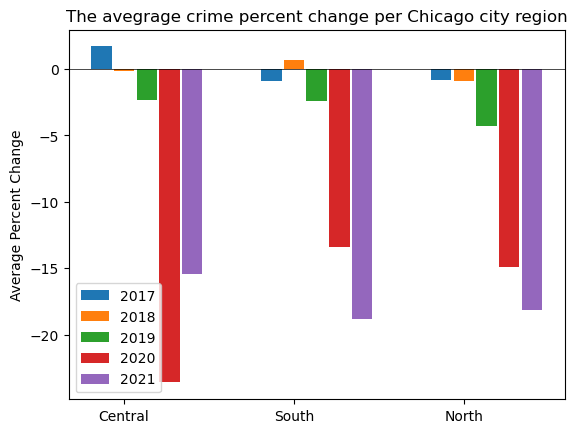

In [25]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):

    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    n_bars = len(data)

    bar_width = total_width / n_bars

    bars = []

    for i, (name, values) in enumerate(data.items()):
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        bars.append(bar[0])

    
    if legend:
        ax.legend(bars, data.keys())



fig, ax = plt.subplots()
bar_plot(ax, data_df.T, total_width=.4, single_width=.9)
plt.axhline(y=0, color='black', linestyle='-',linewidth=0.5)
plt.xticks(np.arange(len(data_df.columns.to_list())),labels=data_df.columns.to_list())
plt.title("The avegrage crime percent change per Chicago city region")
plt.ylabel("Average Percent Change")
plt.show()